# Prosper Loan Data Exploration
## by Isiaq Adebayo Okeyode

## Introduction

* This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
prspr_dt = pd.read_csv('prosperLoanData.csv')

In [3]:
prspr_dt.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
prspr_dt.shape

(113937, 81)

In [5]:
prspr_dt.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
prspr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
prspr_dt.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
prspr_dt.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [9]:
prspr_dt.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [10]:
# subsetting the dataframe to pick the needed columns for the analysis

prspr_dt_sub = prspr_dt[['ListingNumber','Term', 'LoanStatus', 'IncomeRange',
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
             'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

### ASSESSING THE DATA

In [11]:
prspr_dt_sub.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,Not displayed,NaN,NaN,0,GA,Other,Not available,NaN,0.06,False,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [12]:
prspr_dt_sub.sample(5)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
21657,886373,60,Current,"$50,000-74,999",C,5.0,1,NC,Postal Service,Employed,198.0,0.27,False,6041.666667,20000,2013-09-10 00:00:00,Q3 2013,528.10
39997,643102,36,Completed,"$50,000-74,999",D,6.0,2,WA,Civil Service,Employed,78.0,0.23,True,4666.666667,3200,2012-09-27 00:00:00,Q3 2012,122.19
105686,461800,36,Completed,"$25,000-49,999",D,7.0,1,NJ,Analyst,Full-time,34.0,0.38,False,2666.666667,3000,2010-06-22 00:00:00,Q2 2010,126.34
11486,101212,36,Completed,"$1-24,999",NaN,NaN,0,TX,Retail Management,Full-time,92.0,0.97,False,1523.500000,12000,2007-03-07 00:00:00,Q1 2007,440.64
60450,933761,36,Current,"$50,000-74,999",HR,2.0,1,KS,Other,Employed,50.0,0.25,False,4795.333333,3000,2013-10-03 00:00:00,Q4 2013,129.57


In [13]:
prspr_dt_sub.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
IncomeRange                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
DebtToIncomeRatio             8554
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [14]:
prspr_dt_sub.duplicated().sum()

0

In [15]:
prspr_dt_sub.shape

(113937, 18)

In [16]:
prspr_dt_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [17]:
prspr_dt_sub['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [18]:
prspr_dt_sub['ProsperRating (Alpha)'].isnull().sum()

29084

In [19]:
prspr_dt_sub['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [20]:
prspr_dt_sub['ListingCategory (numeric)'].isnull().sum()

0

In [21]:
prspr_dt_sub.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [22]:
prspr_dt_sub.EmploymentStatusDuration.value_counts()

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

In [23]:
prspr_dt_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [24]:
prspr_dt_sub.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [25]:
prspr_dt_sub.StatedMonthlyIncome.value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [26]:
prspr_dt_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   BorrowerState              108422 non-null  object 
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  EmploymentStatusDuration   106312 non-null  float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  StatedMonthlyIncome        11

#### OBSERVATION


* We have missing values in EmploymentStatusDuration, ProsperRating (Alpha), DebtToIncomeRatio columns, ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration columns.

* Convert 'LoanOriginationDate' to Datetime (extract year, month, day and time), 'ListingCategory' from integer to ordered categorical datatype.

* Convert 'IncomeRange' from integer to ordered categorical datatype, 'EmploymentStatus' from string to categorical datatype.

* Convert 'ListingNumber' from integer to string, 'ListingCategory' from numeric to categorical datatype.

* Convert 'LoanStatus' from string to categorical, 'ProsperRating (Alpha)' and 'ProsperScore' from string to  categorical datatype.

* Replace 'Home Owner' with True and 'Not Home Owner' with False then change datatype to categorical.

* Round 'StatedMonthlyIncome' to the nearest whole number.

### DATA CLEANING

In [27]:
# Making copies of my data

prsper_clean = prspr_dt_sub.copy()

In [28]:
prsper_clean.head(2)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93


#### ISSUE

Dropping null rows in EmploymentStatusDuration, ProsperRating (Alpha), DebtToIncomeRatio columns.

In [29]:
# Filtering to get the rows that is not null in EmploymentStatusDuration

prsper_clean = prsper_clean[prsper_clean['EmploymentStatusDuration'].notnull()]

In [30]:
# Filtering to get the rows that is not null in ProsperRating (Alpha)

prsper_clean = prsper_clean[prsper_clean['ProsperRating (Alpha)'].notnull()]

In [31]:
# Filtering to get the rows that is not null in DebtToIncomeRatio

prsper_clean = prsper_clean[prsper_clean['DebtToIncomeRatio'].notnull()]

#### TEST

In [32]:
prsper_clean.EmploymentStatusDuration.isnull().sum()

0

In [33]:
prsper_clean['ProsperRating (Alpha)'].isnull().sum()

0

In [34]:
prsper_clean.DebtToIncomeRatio.isnull().sum()

0

#### ISSUE

Convert 'LoanOriginationDate' to Datetime (extract year, month, day and time) and changing the numbers from (1,2,3....) to (January, February, March......)

In [35]:
from datetime import datetime

In [36]:
prsper_clean.LoanOriginationDate = pd.to_datetime(prsper_clean.LoanOriginationDate)

In [37]:
prsper_clean['LoanOriginationYear'] = prsper_clean['LoanOriginationDate'].dt.year
prsper_clean['LoanOriginationMonth'] = prsper_clean['LoanOriginationDate'].dt.month
prsper_clean['LoanOriginationTime'] = prsper_clean['LoanOriginationDate'].dt.time

In [38]:
# Dropping 'LoanOriginationDate' column

prsper_clean = prsper_clean.drop(['LoanOriginationDate'], axis=1)

In [39]:
# Changing the numbers (1,2,3...) to proper months (January, February, March....)

prsper_clean['LoanOriginationMonth'] = prsper_clean['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])

#### TEST

In [40]:
prsper_clean.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,Q1 2014,318.93,2014,March,00:00:00
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.000000,10000,Q4 2012,321.45,2012,November,00:00:00
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.333333,15000,Q3 2013,563.97,2013,September,00:00:00
5,1074836,60,Current,"$100,000+",B,10.0,1,NM,Professional,Employed,82.0,0.36,True,8333.333333,15000,Q4 2013,342.37,2013,December,00:00:00
6,750899,36,Current,"$25,000-49,999",E,2.0,1,KS,Sales - Retail,Employed,172.0,0.27,False,2083.333333,3000,Q2 2013,122.67,2013,April,00:00:00


In [41]:
prsper_clean.LoanOriginationYear.value_counts()

2013    32171
2012    17477
2014    11267
2011     9924
2010     4919
2009     1785
Name: LoanOriginationYear, dtype: int64

In [42]:
prsper_clean.LoanOriginationMonth.value_counts()

January      8468
October      8096
December     8078
November     7444
Febuary      7127
September    6314
August       6082
July         5803
March        5471
June         5415
May          4856
April        4389
Name: LoanOriginationMonth, dtype: int64

In [43]:
prsper_clean.LoanOriginationTime.value_counts()

00:00:00    77543
Name: LoanOriginationTime, dtype: int64

#### ISSUE

Replacing 'True' with 'Home Owner' and False with 'Not Home Owner', then change datatype to categorical.

In [44]:
# Converting boolean to string

prsper_clean.IsBorrowerHomeowner = prsper_clean.IsBorrowerHomeowner.map({True: 'True', False: 'False'})

# Replace True with Home Owner and False with Not Home Owner

prsper_clean.IsBorrowerHomeowner.replace('True', 'Home Owner', inplace=True)
prsper_clean.IsBorrowerHomeowner.replace('False', 'Not Home Owner', inplace=True)

#### TEST

In [45]:
prsper_clean.IsBorrowerHomeowner.value_counts()

Home Owner        42058
Not Home Owner    35485
Name: IsBorrowerHomeowner, dtype: int64

#### ISSUE

 Change 'ListingCategory' to categorical datatype, 'ListingNumber' to string, 'EmploymentStatus' to categorical, 'IsBorrowerHomeOwner' to categorical.
Change LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types.

In [46]:
# Change LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types

ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prsper_clean[var] = prsper_clean[var].astype(ordered_var)

In [47]:
prsper_clean['ListingCategory (numeric)'] = prsper_clean['ListingCategory (numeric)'].astype('category')

In [48]:
prsper_clean.ListingNumber = prsper_clean.ListingNumber.astype(str)

In [49]:
prsper_clean['EmploymentStatus'] = prsper_clean['EmploymentStatus'].astype('category')

In [50]:
prsper_clean['IsBorrowerHomeowner'] = prsper_clean['IsBorrowerHomeowner'].astype('category')

#### TEST

In [51]:
prsper_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              77543 non-null  object  
 1   Term                       77543 non-null  int64   
 2   LoanStatus                 77543 non-null  category
 3   IncomeRange                77543 non-null  category
 4   ProsperRating (Alpha)      77543 non-null  category
 5   ProsperScore               77543 non-null  category
 6   ListingCategory (numeric)  77543 non-null  category
 7   BorrowerState              77543 non-null  object  
 8   Occupation                 76216 non-null  object  
 9   EmploymentStatus           77543 non-null  category
 10  EmploymentStatusDuration   77543 non-null  float64 
 11  DebtToIncomeRatio          77543 non-null  float64 
 12  IsBorrowerHomeowner        77543 non-null  category
 13  StatedMonthlyIncome        775

#### ISSUE

In [52]:
# Filling missing values in Occupation column with None Given

prsper_clean.Occupation = prsper_clean.Occupation.fillna('None Given')

#### TEST

In [53]:
prsper_clean.Occupation.isnull().sum()

0

#### ISSUE

In [54]:
# Rounding StatedMonthlyIncome to nearest whole number

prsper_clean.StatedMonthlyIncome = prsper_clean.StatedMonthlyIncome.round(decimals=0)
prsper_clean.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,36,Current,"$50,000-74,999",A,7,2,CO,Professional,Employed,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,March,00:00:00
3,658116,36,Current,"$25,000-49,999",A,9,16,GA,Skilled Labor,Employed,113.0,0.15,Home Owner,2875.0,10000,Q4 2012,321.45,2012,November,00:00:00
4,909464,36,Current,"$100,000+",D,4,2,MN,Executive,Employed,44.0,0.26,Home Owner,9583.0,15000,Q3 2013,563.97,2013,September,00:00:00
5,1074836,60,Current,"$100,000+",B,10,1,NM,Professional,Employed,82.0,0.36,Home Owner,8333.0,15000,Q4 2013,342.37,2013,December,00:00:00
6,750899,36,Current,"$25,000-49,999",E,2,1,KS,Sales - Retail,Employed,172.0,0.27,Not Home Owner,2083.0,3000,Q2 2013,122.67,2013,April,00:00:00


#### TEST

In [55]:
prsper_clean.StatedMonthlyIncome.value_counts()

4167.0     2429
5000.0     2307
3333.0     1916
5833.0     1830
5417.0     1770
           ... 
8653.0        1
36250.0       1
1602.0        1
2166.0        1
18756.0       1
Name: StatedMonthlyIncome, Length: 6255, dtype: int64

In [56]:
prsper_clean.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,36,Current,"$50,000-74,999",A,7,2,CO,Professional,Employed,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,March,00:00:00
3,658116,36,Current,"$25,000-49,999",A,9,16,GA,Skilled Labor,Employed,113.0,0.15,Home Owner,2875.0,10000,Q4 2012,321.45,2012,November,00:00:00
4,909464,36,Current,"$100,000+",D,4,2,MN,Executive,Employed,44.0,0.26,Home Owner,9583.0,15000,Q3 2013,563.97,2013,September,00:00:00
5,1074836,60,Current,"$100,000+",B,10,1,NM,Professional,Employed,82.0,0.36,Home Owner,8333.0,15000,Q4 2013,342.37,2013,December,00:00:00
6,750899,36,Current,"$25,000-49,999",E,2,1,KS,Sales - Retail,Employed,172.0,0.27,Not Home Owner,2083.0,3000,Q2 2013,122.67,2013,April,00:00:00


In [57]:
print(prsper_clean.dtypes)
print(prsper_clean.shape)
print(prsper_clean.describe())
print(prsper_clean.head(5))
print(prsper_clean.columns)

ListingNumber                  object
Term                            int64
LoanStatus                   category
IncomeRange                  category
ProsperRating (Alpha)        category
ProsperScore                 category
ListingCategory (numeric)    category
BorrowerState                  object
Occupation                     object
EmploymentStatus             category
EmploymentStatusDuration      float64
DebtToIncomeRatio             float64
IsBorrowerHomeowner          category
StatedMonthlyIncome           float64
LoanOriginalAmount              int64
LoanOriginationQuarter         object
MonthlyLoanPayment            float64
LoanOriginationYear          category
LoanOriginationMonth         category
LoanOriginationTime            object
dtype: object
(77543, 20)
               Term  EmploymentStatusDuration  DebtToIncomeRatio  \
count  77543.000000              77543.000000       77543.000000   
mean      42.724630                104.240757           0.258739   
std       

In [58]:
prsper_clean.shape

(77543, 20)

In [59]:
prsper_clean.to_csv('LoanData.csv', index=False)

In [60]:
new_prsper = pd.read_csv('LoanData.csv')

In [61]:
new_prsper.head(1)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
0,1209647,36,Current,"$50,000-74,999",A,7,2,CO,Professional,Employed,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,March,00:00:00


### What is the structure of your dataset?

> The cleaned Prosper Loan data consists of 77543 rows and 20 columns (ListingNumber, Term, LoanStatus, IncomeRange,
  ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus,
  EmploymentStatusDuration, DebtToIncomeRatio, IsBorrowerHomeowner, StatedMonthlyIncome, LoanOriginalAmount',
  MonthlyLoanPayment, LoanOriginationYear, LoanOriginationMonth, LoanOriginationTime, LoanOriginationQuarter)
  
> Some variables are numerical, others are categorical.

> The variables below are ordered categorical variables with the following levels.

> LoanStatus: 'Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress' ,'Past Due (1-15 days)', Past Due (16-30 days), 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)', 'Past Due (>120 days)']

> ProsperRating (Alpha) : 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'

> ProsperScore : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

> IncomeRange : Not displayed, Not employed, 1-24,999, 50,000-74,999, 100,000+

> ListingCreationMonth : 'January','Febuary', 'March','April','May','June','July','August','September', 'October', 'November', 'December'

> ListingCreationYear : 2009, 2010, 2011, 2012, 2013, 2014


### What is/are the main feature(s) of interest in your dataset?

> I'm assuming the role of a Borrower and I want figure out what determines the maximum Loan Amount to be given out to a Borrower?

> Main Feature of interest is LoanOriginalAmount in the dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that StatedMonthlyIncome will have the strongest effect on the Loan Original Amount: the higher the income, the higher the Loan Original Amount. I also think that DebtToIncomeRatio, Loan Term and Prosper risk score will have an effect on the Loan Original Amount.

> I have an expectation that being a home owner have a positive effect on Loan Original Amount. 

## Univariate Exploration

In this section, I'm going to investigate and visualize individual variables

#### I'd start by checking how LoanOriginalmount is distributed

Text(0.5, 1.0, 'Distribution of Loan Amount')

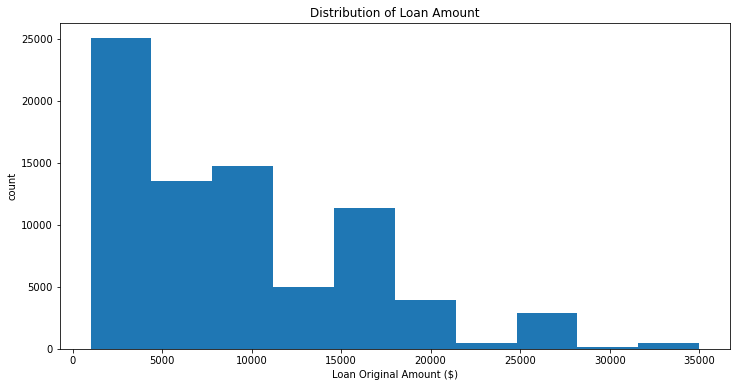

In [62]:
# A simple histogram plot of the variable LoanOriginalAmount

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x= 'LoanOriginalAmount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount')

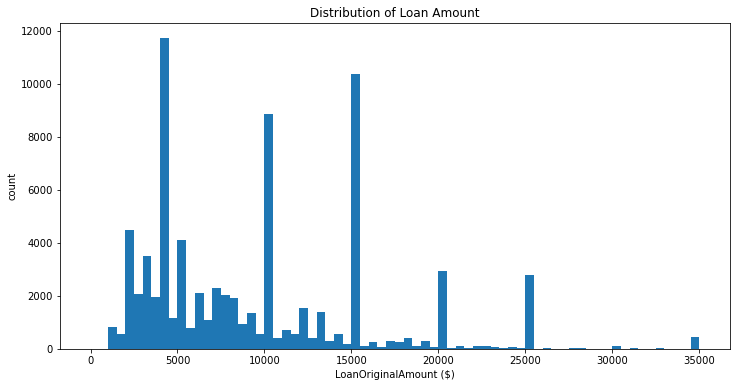

In [63]:
# Adding binsize and Figsize

binsize = 500
bins = np.arange(0, new_prsper['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

##### Observation

The peak values are at around 5,000, 10,000, 15,000, 20,000, 25,000 and 35,000 (in USD). This means that loans are given out in rounded figures and in multiples of 5,000.
I observe that majority of loans are given out at 4,000 , 10,000 and 15,0000.

#### Let's look at the StatedMonthlyIncome which is part of the part of the predictor

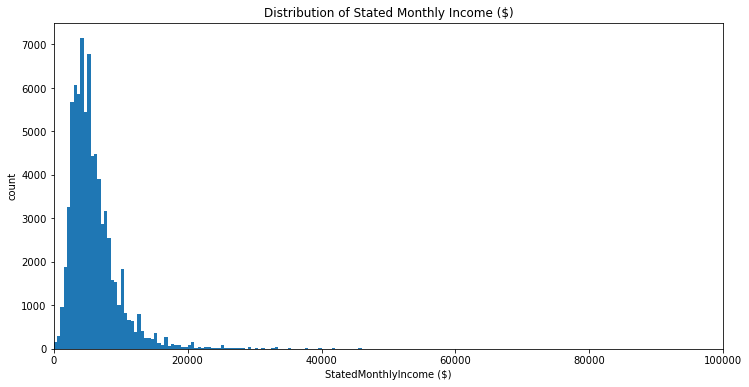

In [64]:
# Using bin size and Figsize

binsize = 500
bins = np.arange(0, new_prsper['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.xlim(0, 100000)
plt.show()

From the plot, it can be observed that the data is concentrated between (0-20000) but the long tail indicates presence of outliers in the data, lets check it.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot distribution of Stated Monthly Income')

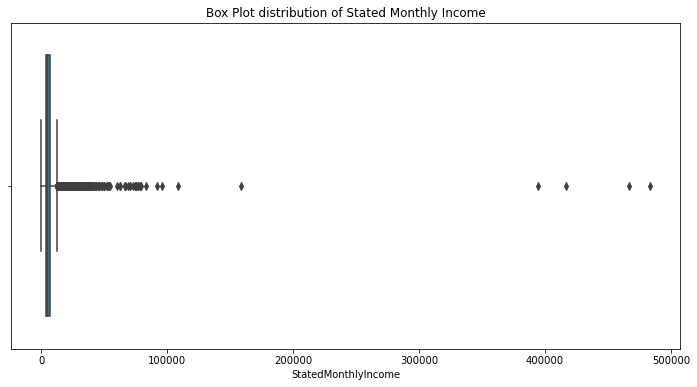

In [65]:
# Plotting a box plot with Stated monthly income variable to check for outliers

plt.figure(figsize=[12, 6])
sns.boxplot(new_prsper['StatedMonthlyIncome'])
plt.title('Box Plot distribution of Stated Monthly Income')

As seen above, my suspicion that an outlier is present is confirmed, I'll go ahead to use the InterQuartile Range (IQR) method to detect outliers, then trim to remove those outliers.

In [66]:
# Using IQR method to detect outliers

Q1 = new_prsper['StatedMonthlyIncome'].quantile(0.25)
Q3 = new_prsper['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [67]:
# Transformation to remove outliers

new_prsper = new_prsper[new_prsper['StatedMonthlyIncome'] < UpperLimit]

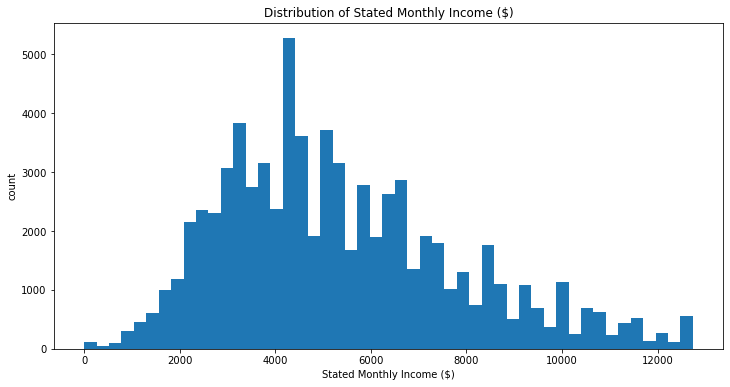

In [68]:
# Plotting an histogram with trimmed dataframe

binsize = 260
bins = np.arange(0, new_prsper['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

##### Observation

Stated Monthly Income had a long-tailed distribution with a lot of people earning on the low stated Monthly Income end. When trimmed and capped to remove outliers, a significant peak is found around the 4,000 (USD) mark.
It's interesting to note a little peak at $0 as well. This is representing people who are unemployed.


#### Let's check the income ranges that is getting loan the most

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


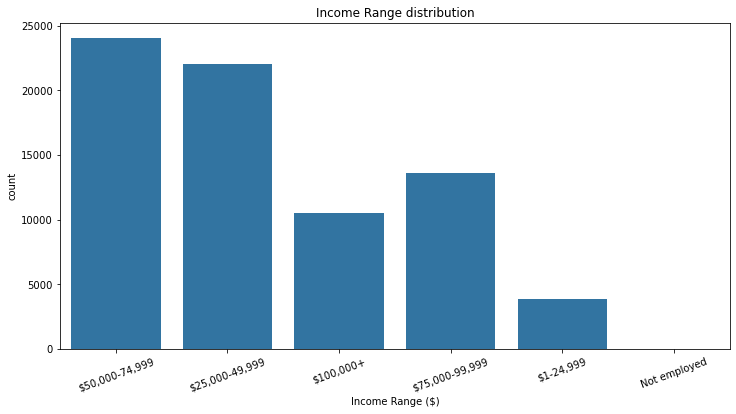

In [69]:
#Selecting one color from seaborn's color palette
base_color = sns.color_palette()[0]

plt.figure(figsize=[12, 6])
sns.countplot(new_prsper.IncomeRange, color=base_color)
plt.title('Income Range distribution')
plt.xlabel('Income Range ($)')
plt.xticks(rotation=20);

##### Observation
People with income ranges of 25,000 to 75,000 (USD) gets the most loan while people with no income gets nothing.

#### Let's take a look at other predictors (DebtToIncomeRatio)

Text(0.5, 1.0, 'Distribution of Debt-To-Income-Ratio')

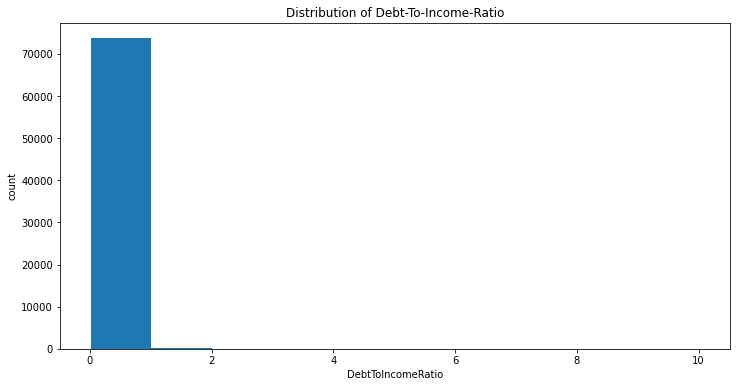

In [70]:
# A simple histogram plot of the variable 

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count')
plt.title('Distribution of Debt-To-Income-Ratio')

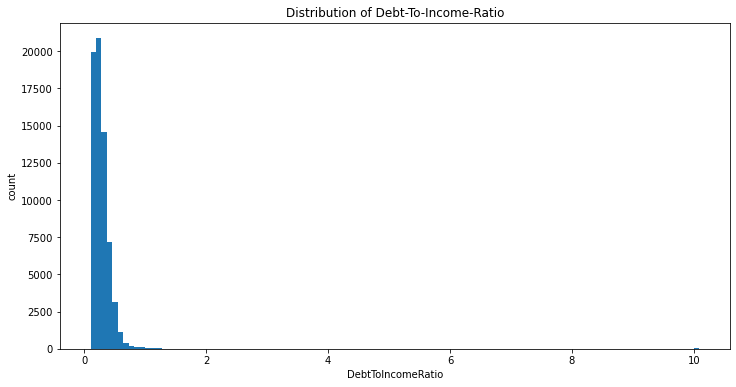

In [71]:
# Investigating further by adding bins and binsize

binsize = 0.09
bins = np.arange(0.1, new_prsper['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of Debt-To-Income-Ratio');
plt.show()

Text(0.5, 1.0, 'Distribution of Debt-To-Income-Ratio')

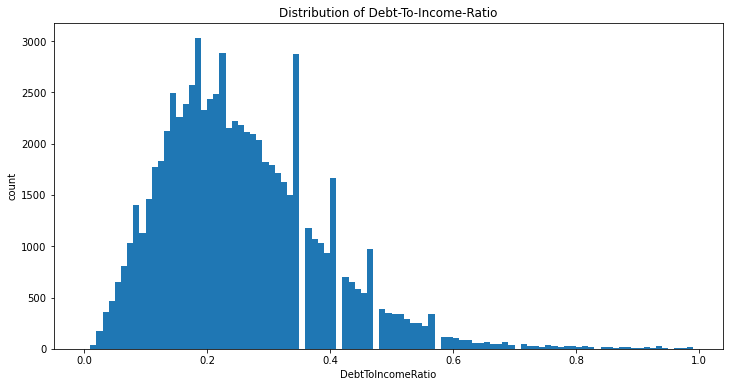

In [72]:
# Investigating further on an even smaller bin size

bins = np.arange(0,1, 0.01)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count')
plt.title('Distribution of Debt-To-Income-Ratio')

##### Observation

Even though most Lenders prefer a debt-to-income-ratio thats (36%) or leser. But depending on the loan type 50% is a threshold value.

As seen on the plot above, large spikes in frequency are observed around 0.2 and 0.36. This implies that majority of borrowers have a Debt-To-Income Ratio below the threshhold value.

#### Visualizing Loan Term

Text(0.5, 1.0, 'Loan Term Occurence')

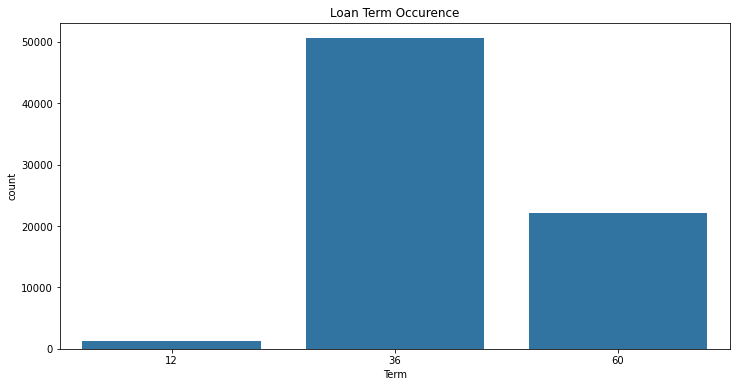

In [73]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x='Term', color=base_color)
plt.title('Loan Term Occurence')

##### Observation
It is observed that majority of the loan is termed at 36 months (3 years)

#### Another variable of interest is MonthlyLoanPayment

Text(0.5, 1.0, 'Distribution of Monthly Loan Payment')

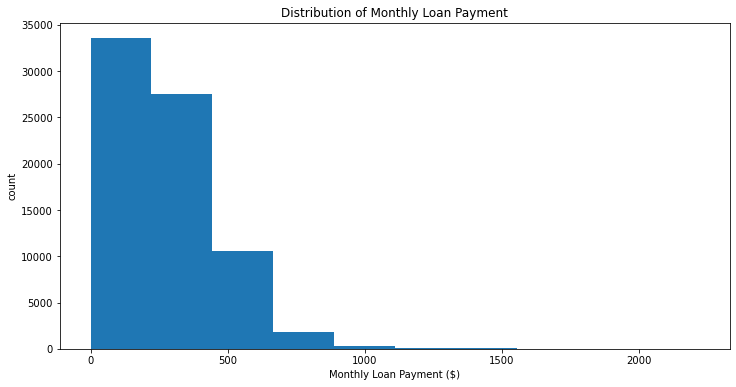

In [74]:
# A simple histogram plot of the variable

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='MonthlyLoanPayment')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Distribution of Monthly Loan Payment')

Text(0.5, 1.0, 'Distribution of Monthly Loan Payment')

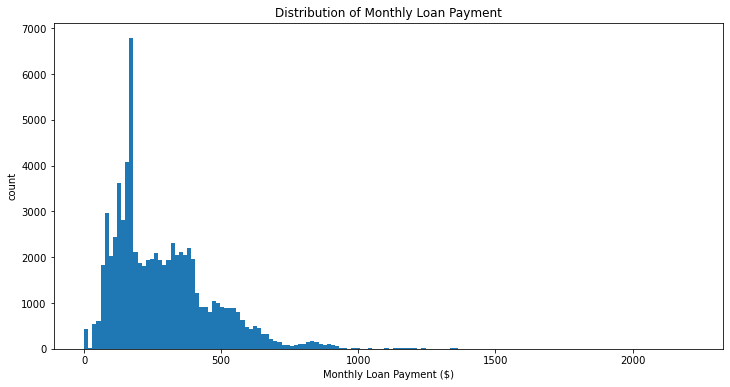

In [75]:
# Adding bin size in other to get more insight

binsize = 15
bins = np.arange(0, new_prsper['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Distribution of Monthly Loan Payment')


##### Observation

The distribution is unimodal with a large number of loaners making a monthly payment at approximately 200 dollars.
Majority of the monthly loan payment is below 500 dollars.


#### The next one is ProsperScore

Text(0.5, 1.0, 'Prosper Score distribution')

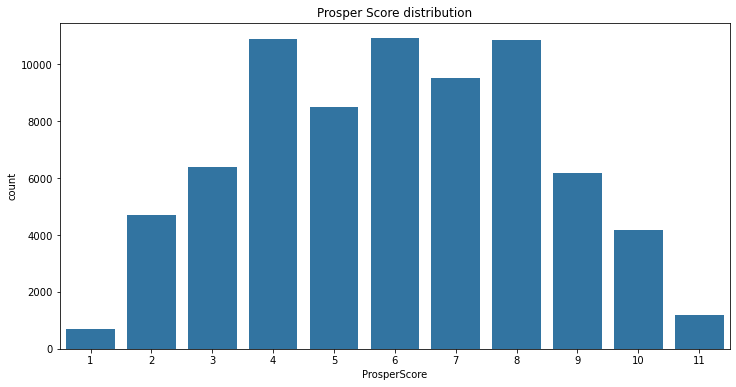

In [76]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x='ProsperScore',color=base_color)
plt.title('Prosper Score distribution')

##### Observation

Prosper score which assesses risk levels for loan is roughly trimodal at 4, 6, 8 risk levels 

#### Next one is EmploymentStatusDuration

Text(0.5, 1.0, 'Occurence of EmploymentStatusDuration (in months)')

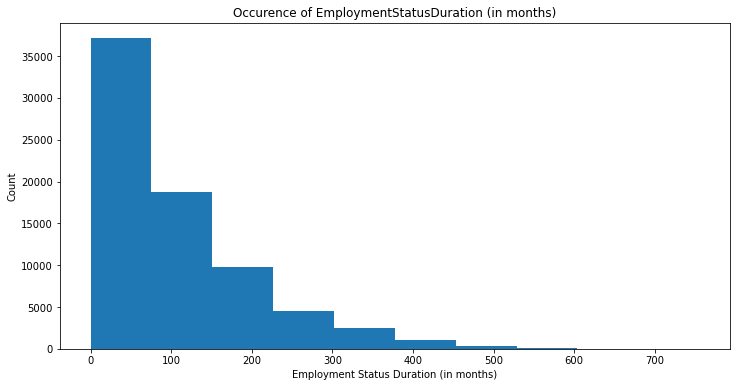

In [77]:
# Histogram representation

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='EmploymentStatusDuration')
plt.ylabel('Count')
plt.xlabel('Employment Status Duration (in months)')
plt.title('Occurence of EmploymentStatusDuration (in months)')

Text(0.5, 1.0, 'Occurence of EmploymentStatusDuration (in months)')

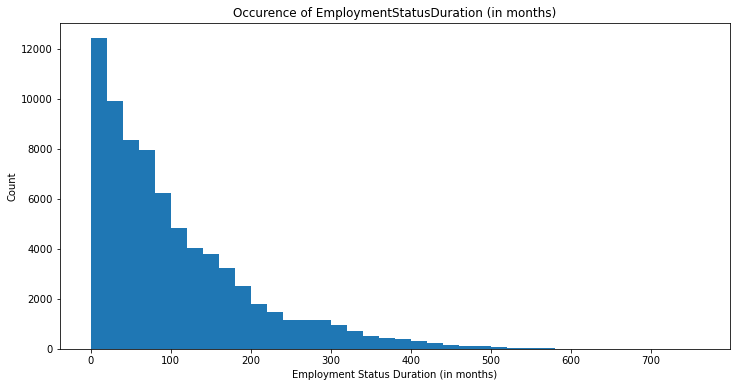

In [78]:
# Adding bins and binsize to gain more insight

binsize = 20
bins = np.arange(0, new_prsper.EmploymentStatusDuration.max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='EmploymentStatusDuration', bins=bins)
plt.ylabel('Count')
plt.xlabel('Employment Status Duration (in months)')
plt.title('Occurence of EmploymentStatusDuration (in months)')

##### The plot above shows EmploymentStatusDuration

#### Moving on to ordinal variables

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

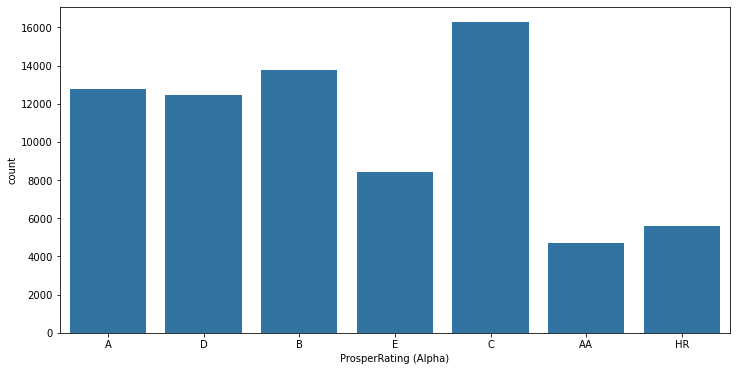

In [79]:
# let's start from ProsperRating distribution.

plt.figure(figsize = [12, 6])
sns.countplot(data = new_prsper, x = 'ProsperRating (Alpha)', color = base_color)

##### Observation

Majority of Prosper ratings is C which indicates Average risk level.

<AxesSubplot:xlabel='LoanOriginationYear', ylabel='count'>

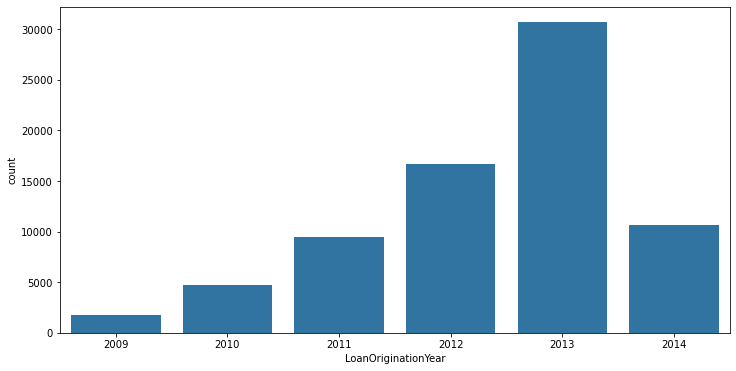

In [80]:
# Next one is LoanOriginationYear

plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'LoanOriginationYear', color = base_color)

##### Observation

Most of the Loans originated were generally made in the year 2013 and it dropped in 2014.

<AxesSubplot:xlabel='LoanOriginationMonth', ylabel='count'>

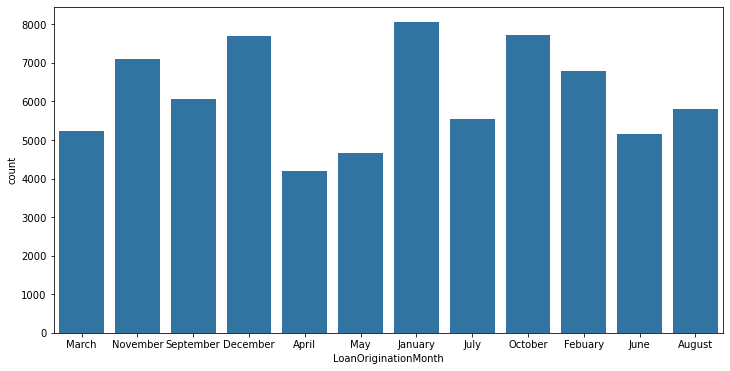

In [81]:
# Last but not the least LoanOriginationMonth

plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'LoanOriginationMonth', color = base_color)

##### Observation

Most of the Loans originated were made towards the end of a year (October, November, December) or at the beginning of a year (January, Febuary), probably to fast track the project.

From what's observation in the Loan Origination distribution. I'm curious to know if in the year 2013, probability of getting a high loan amount is high compared to other years. I'm interested in knowing the average loan amount to a person in each year.

#### Moving on to Nominal Variables

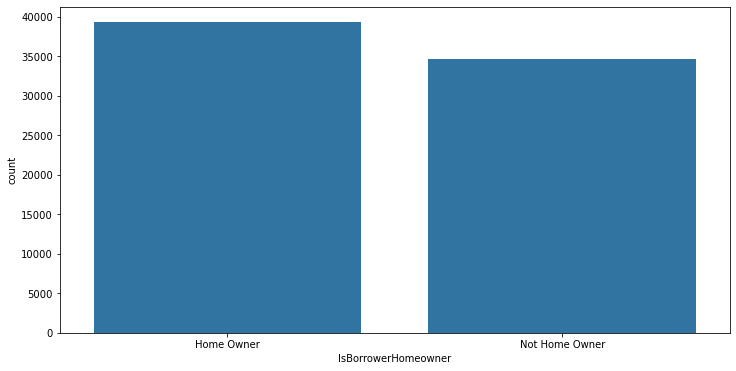

In [82]:
# Let's start from IsBorrowerHomeowner distribution

plt.figure(figsize = [12, 6])

sns.countplot(data = new_prsper, x = 'IsBorrowerHomeowner', order = new_prsper['IsBorrowerHomeowner'].value_counts().index, 
             color = base_color)

plt.show()



##### Observation

Approximately 60% of the borrowers are home owners.

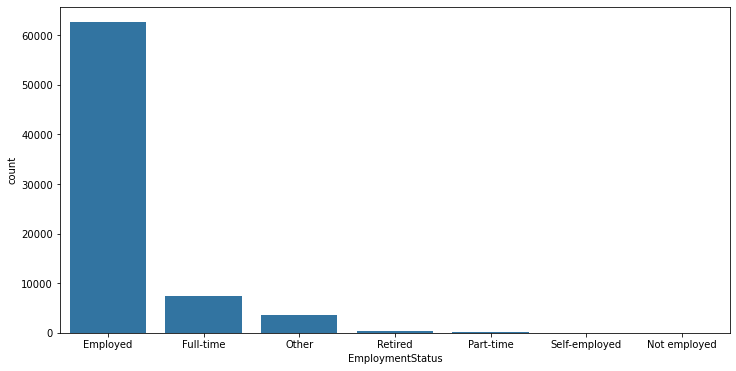

In [83]:
# Next one is EmploymentStatus distribution

plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'EmploymentStatus', order = new_prsper['EmploymentStatus'].value_counts().index,
             color = base_color)
plt.show()

##### Observation

Most Borrowers are gainfully Employed or working Full-time.

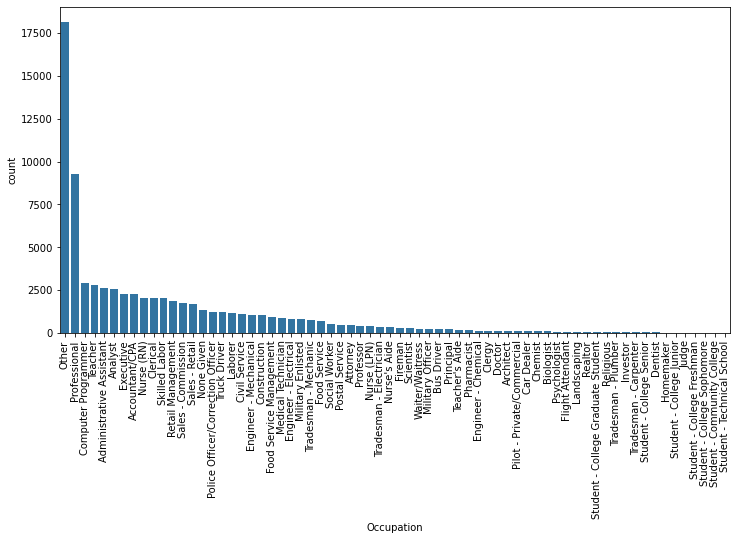

In [84]:
# The last one is Occupation distribution

plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'Occupation', order = new_prsper['Occupation'].value_counts().index, 
             color = base_color)
plt.xticks(rotation=90)

plt.show()

##### Observation

The top Borrower Occupation are Other (Probably Government, Big Pharma and host of others), Professional, Computer Programmer, Executives, Teacher, Analyst and Administrative Assistant.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoanOriginalAmount variable took a range of 1,000 to 35,000 (USD). After plotting the data looked Trimodal with a peak just below 5,000 and the other peaks at 10,000 and 15,000. Also, There was no unusual points so I didn't see the need to perform any transformations.

> The Loan Origination rose gradually over the years, then 2013 it spiked up. Then dropped back in 2014. More loans were issued out in 2013.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the stated monthly income variable, outliers were observed. These points were abnormally far from other data point and seemed highly unlikely to be a Monthly income. For safety, these points were removed by trimming in order to move forwards.

> When investigating the DebtToIncomeRatio the plot was scaled to focus on range of 0.1 to 1.0 to discover interesting insights.

## Bivariate Exploration

> In this section I'll be investigating the relationships between pairs of variables in my
data.

#### I will start by arranging the variables into 2 groups (Numeric and categorcal)

In [85]:
# placing numeric variables together and categorical together

numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment']
categoric_vars = ['ProsperScore', 'ProsperRating (Alpha)','EmploymentStatus', 'IsBorrowerHomeowner', 'LoanStatus']

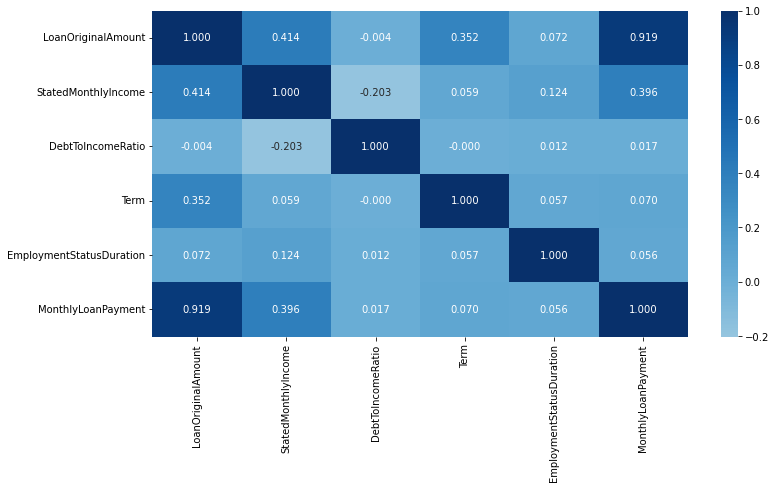

In [86]:
# Heatmap

plt.figure(figsize = [12, 6])
sns.heatmap(new_prsper[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0)
plt.show()

##### Observation

From the heatmap above, one can see that there is a strong relationship between Monthly Loan Payment and Loan Original Amount (0.919).

There's a weak positive correlation between Stated Monthly Income and Loan Original Amount (0.414)
There's a weak positive correlation between Term and Loan Original Amount (0.352)
There's a weak positive correlation between Term and Monthly Loan Payment (0.396)

#### Using pairplots to check the correlation

new_prsper.shape= (74035, 20)
new_prsper.shape= (74035, 20)


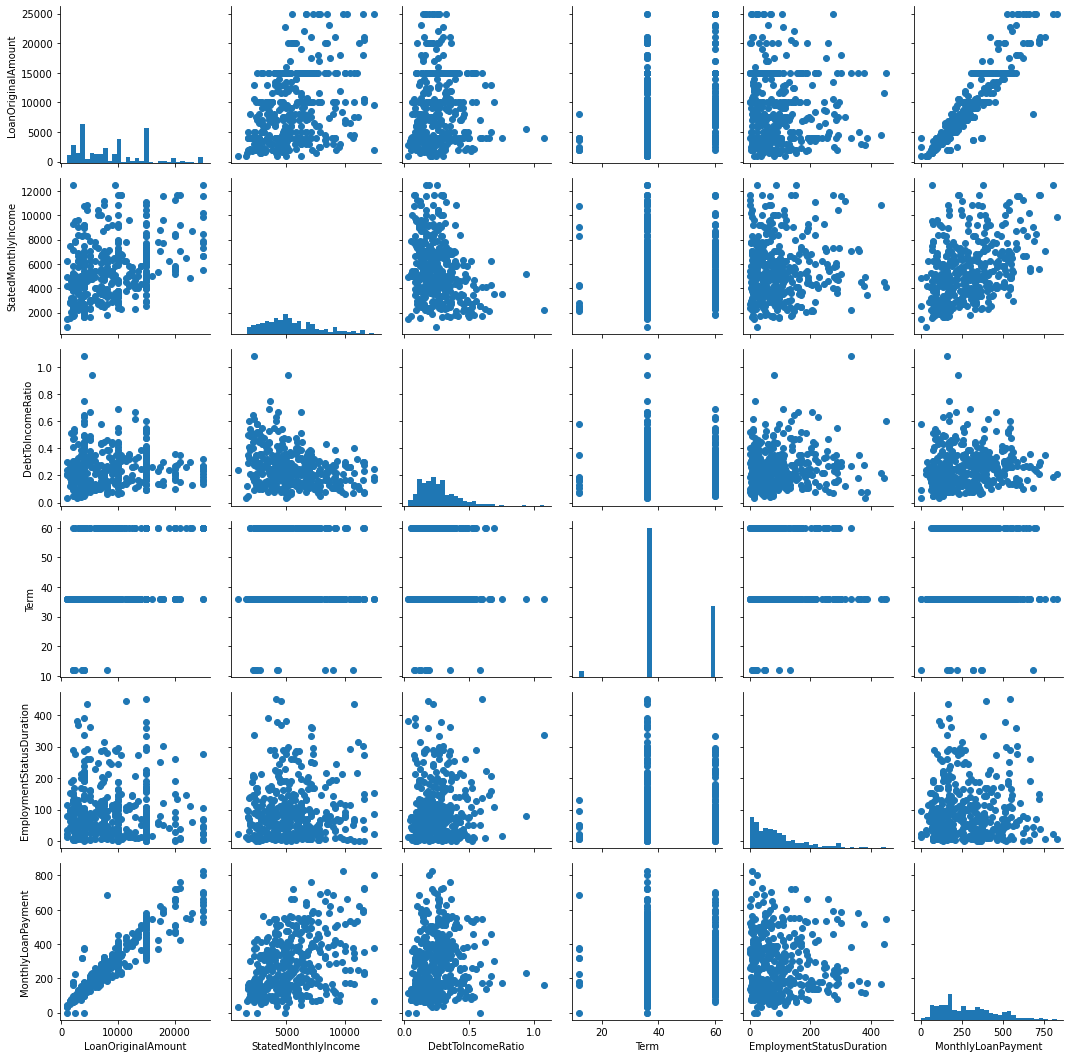

In [87]:
# sample 400 Loan data so that plots are clearer and they run faster


print("new_prsper.shape=", new_prsper.shape)
new_prsper_samp = new_prsper.sample(n=400, replace = False)
print("new_prsper.shape=", new_prsper.shape)

g = sns.PairGrid(data = new_prsper_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 30)
g.map_offdiag(plt.scatter)

##### Observation

As expected LoanOriginalAmount and MonthlyLoanPayment are highly correlated. It is not surprising because if a borrower agrees to pay a high monthly Loan Payment, he'll likely get granted a higher Loan Amount. Also LoanOriginalAmount and StatedMonthlyIncome are positively correlated.

#### Let's see how LoanOriginalAmount and StatedMonthlyIncome correlate with the categorical variables.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 864x1296 with 0 Axes>

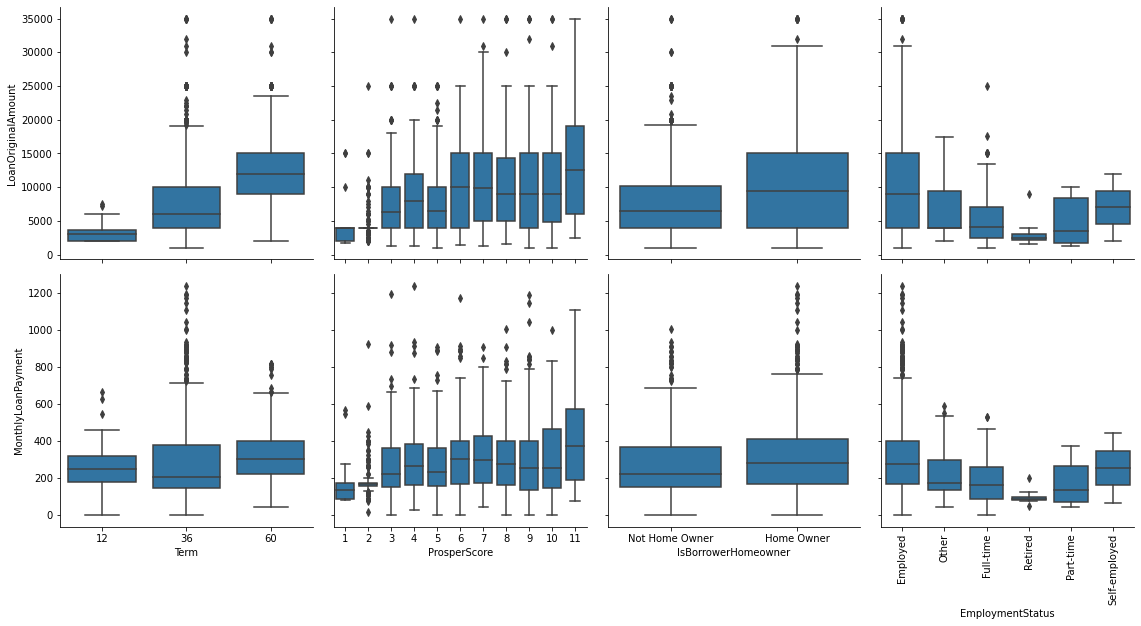

In [88]:
# plot matrix of numeric features against categorical features.

new_prsper_samp = new_prsper.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sns.boxplot(x=x, y=y, color=base_color)

plt.figure(figsize = [12, 18])
g = sns.PairGrid(data = new_prsper_samp, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['Term','ProsperScore', 'IsBorrowerHomeowner',
                                                                                            'EmploymentStatus'],
                size= 4, aspect = 1.0)

g.map(boxgrid);
plt.xticks(rotation=90);

##### Observation

There is a positive relationship between the categorical variables and the two numeric variables of interest.

Borrowers with the features (Longer Loan Term , best Prosper score/low risk, Home Owners, Employed) gets the Highest Loan Amount.
Borrowers with best Prosper Score(low risk), Employed or owning a home, tend to pay higher Loan Payment monthly.

#### Let's look at relationships between the three categorical variables.

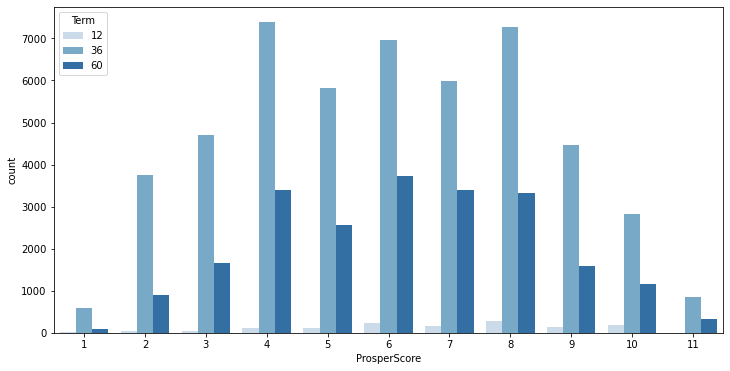

In [89]:
plt.figure(figsize = [12, 6])

sns.countplot(data = new_prsper, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

plt.show()

<AxesSubplot:xlabel='ProsperScore', ylabel='count'>

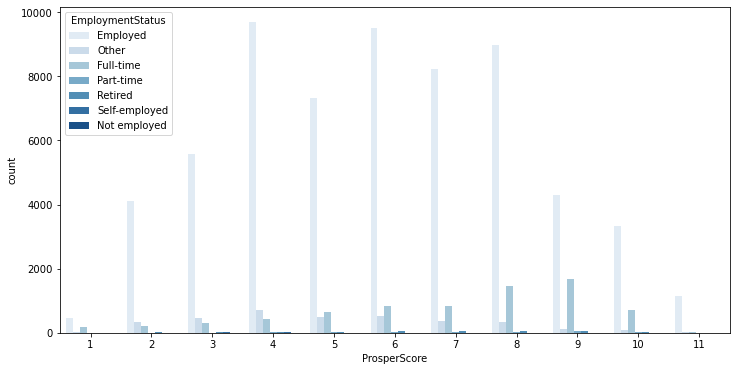

In [90]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')

<AxesSubplot:xlabel='ProsperScore', ylabel='count'>

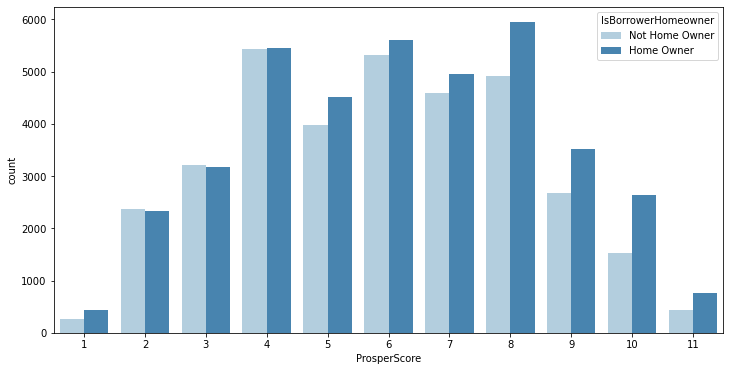

In [91]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Blues')

#### Let's look at correlation between MonthlyLoanPayment and LoanOriginalAmount

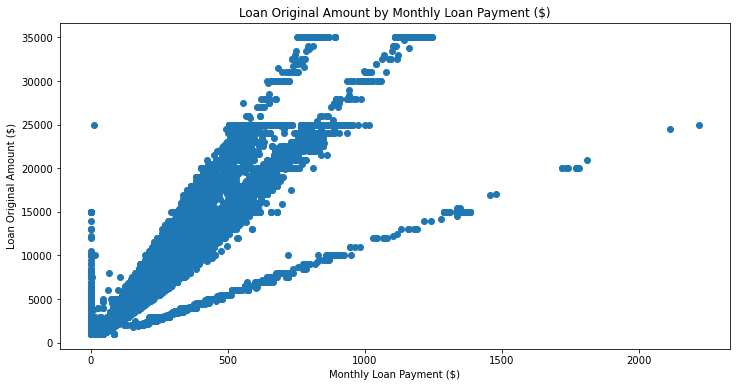

In [92]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment

plt.figure(figsize = [12, 6])
plt.scatter(data = new_prsper, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Monthly Loan Payment ($)')
plt.show()

<AxesSubplot:xlabel='MonthlyLoanPayment', ylabel='LoanOriginalAmount'>

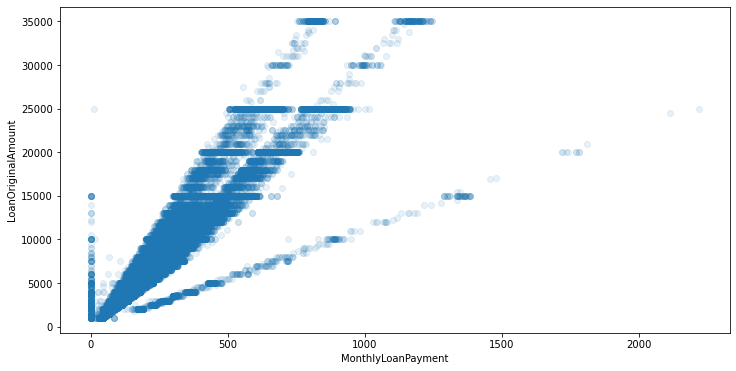

In [93]:
# Using jitter and transparency to help with overplotting

plt.figure(figsize = [12, 6])
sns.regplot(data = new_prsper, x='MonthlyLoanPayment', y='LoanOriginalAmount',fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}))

##### Observation

From the plot above, there is a strong positive relationship between Loan Amount and Monthly Loan Payment. This is likely because, monthly loan payment is decided or calculated using the Loan amount.

#### Checking relationship between DebtToIncomeRatio and LoanOriginalAmount

Text(0.5, 1.0, 'Loan Original Amount ($) by Debt to Income Ratio')

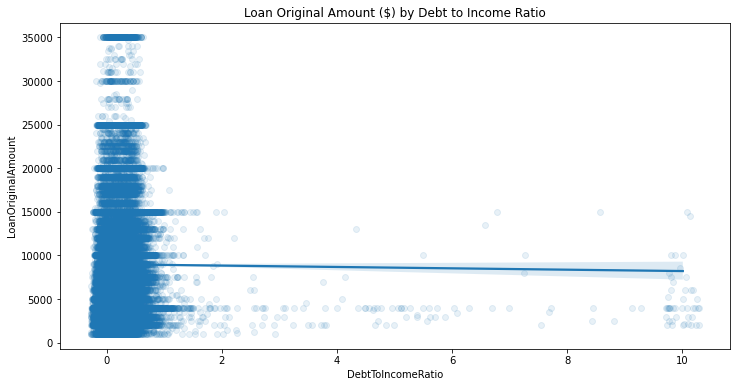

In [94]:
plt.figure(figsize=[12, 6])

sns.regplot(data = new_prsper, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}))
plt.title('Loan Original Amount ($) by Debt to Income Ratio')

Text(0.5, 1.0, 'Loan Original Amount ($) by Debt to Income Ratio')

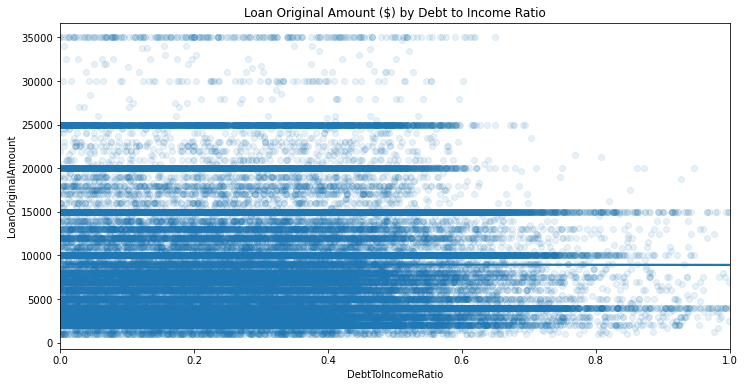

In [95]:
plt.figure(figsize=[12, 6])
sns.regplot(data = new_prsper, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}))
plt.xlim(0,1)
plt.title('Loan Original Amount ($) by Debt to Income Ratio')

##### Observation

I deduce that having a low DebtToIncomeRatio will increase LoanOriginalAmount. From the plot above, This estimate is proven to be true. The dots clustered at the left corner shows that when a borrower has a relatively low DebtToincomeRatio(< 1), the borrower is more likely either to get an high Loan Amount or a low Loan Amount. However, when the borrowers DebtToIncomeRatio is high, the borrower is certain to get a Lower Loan Amount.


Text(0.5, 1.0, 'Loan Original Amount by Stated Monthly Income ($)')

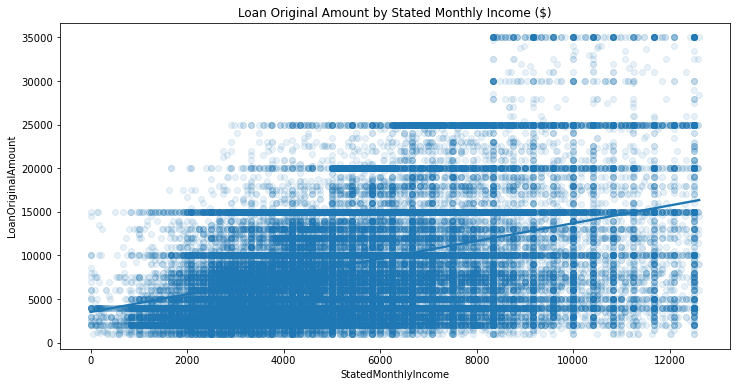

In [96]:
plt.figure(figsize=[12, 6])
sns.regplot(data = new_prsper, x='StatedMonthlyIncome', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}))
plt.title('Loan Original Amount by Stated Monthly Income ($)')

##### Observation

My earlier assumption is that the higher the Monthly Income the higher the Loan Amount. This assumption is proven to be true from this plot.
When a borrower has relatively low Monthly Income (<8,000) the probabilities of getting low and high Loan Amount are smaller.
However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a High Loan Amount.

#### Next: Occupation against Loan Amount

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Professional'),
  Text(1, 0, 'Skilled Labor'),
  Text(2, 0, 'Executive'),
  Text(3, 0, 'Sales - Retail'),
  Text(4, 0, 'Laborer'),
  Text(5, 0, 'Food Service'),
  Text(6, 0, 'Fireman'),
  Text(7, 0, 'Construction'),
  Text(8, 0, 'Computer Programmer'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Sales - Commission'),
  Text(11, 0, 'Retail Management'),
  Text(12, 0, 'Engineer - Mechanical'),
  Text(13, 0, 'Military Enlisted'),
  Text(14, 0, 'Clerical'),
  Text(15, 0, 'None Given'),
  Text(16, 0, 'Teacher'),
  Text(17, 0, 'Clergy'),
  Text(18, 0, 'Nurse (RN)'),
  Text(19, 0, 'Accountant/CPA'),
  Text(20, 0, 'Analyst'),
  Text(21, 0, 'Flight Attendant'),
  Text(22, 0, 'Nurse (LPN

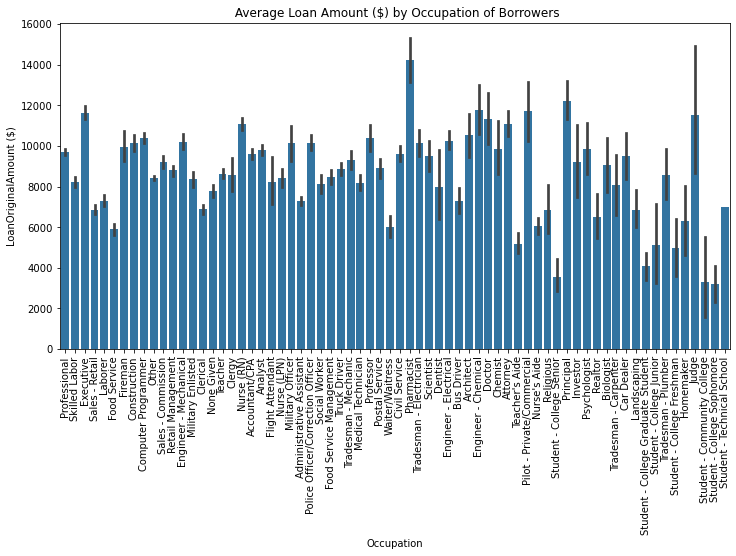

In [97]:
plt.figure(figsize=[12, 6])

sns.barplot(data = new_prsper, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('LoanOriginalAmount ($)')
plt.title(' Average Loan Amount ($) by Occupation of Borrowers')
plt.xticks(rotation=90)

##### Observation

The Top Occupation with the highest Loan Amount are Judge, Pharmacist and Doctor. This could be because these are the highest paying jobs.


#### Next: ProsperScore correlation with Loan Amount

Text(0.5, 1.0, 'Loan Amount given out by Prosper Risk Score')

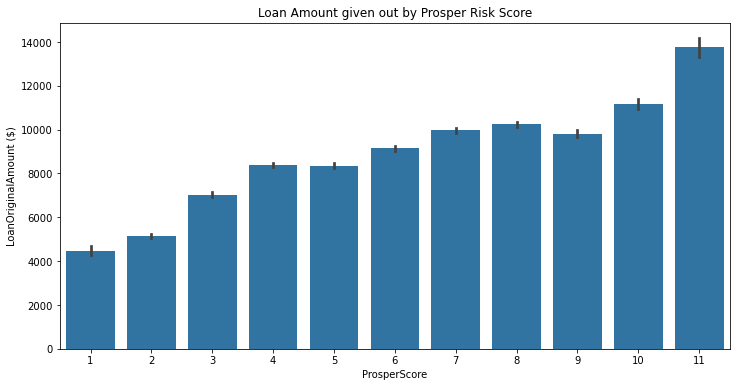

In [98]:
plt.figure(figsize=[12, 6])

sns.barplot(data = new_prsper, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount given out by Prosper Risk Score')

##### Observation

As seen from plot above, generally the Loan Amount increases as the Prosper risk reduces(or Prosper number increases). This shows that low/no risk borrowers have a higher chance of getting larger Loan Amounts.

#### Next: Home Owner relationship with Loan Amount

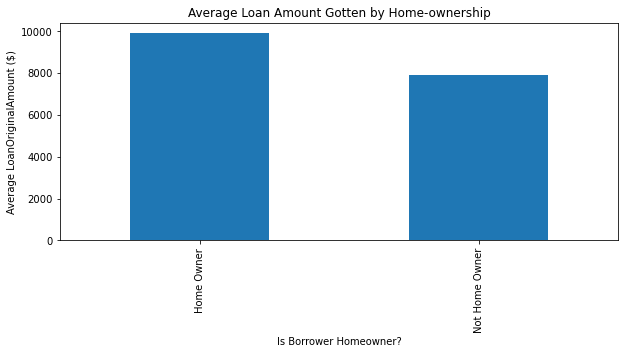

In [99]:
# Plot average Loan Amount by Home-ownership

data = new_prsper.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']


# Create a plot as the variable "ax"

ax = data.plot(kind='bar',
               title="Average Loan Amount Gotten by Home-ownership",
               figsize = (10,4), color=base_color)


# Set axis labels for the "ax" plot

ax.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

##### Observation

This plot shows that Borrowers with a home are getting more loans combined that Borrowers without one.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Amount has a positive correlation with Monthly Income. I discovered that with borrowers with a relatively low Monthly Income, the probabilities of getting a Low or High Loan Amount is slightly similar. However, with a High Monthly Income, the Loan Amount received is Higher.

> An interesting discovery is that as DebtToIncomeRatio increases, the Loan Amount decreases as well. This is because Lenders classify a High DebtToIncomeRatio as a borrowing risk so they tend to Loan out less money to this category of people.

> There was also an interesting relationship between Loan Amount and the categorical features. More Loans are associated with Borrowers with a Longer loan Term, Low risk involved(high Prosper Score), Owning a Home and being successfully employed.

A positive linear relationship was observed was observed when Loan Amount was plotted against Monthly Loan Payment. The scatter plot showed 3 pair of lines. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that Borrowers with a Home and successfully employed paid the most Monthly loan.

## Multivariate Exploration

> In this section, I'll create plots of three or more variables to investigate my data even
further.

#### I'd like to see if being a Home Owner and having a good risk score will effect the Loan Amount

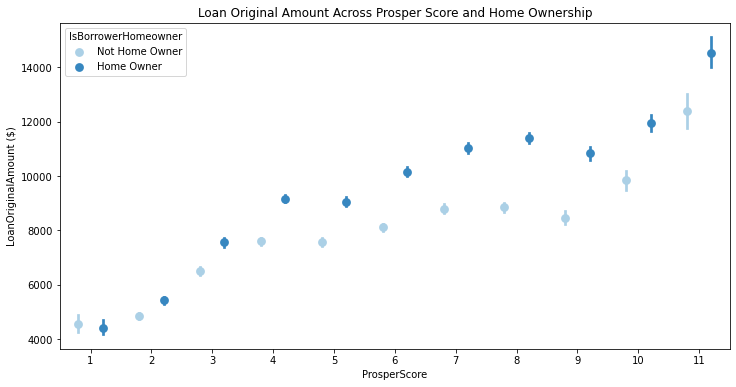

In [100]:
fig = plt.figure(figsize = [12, 6])
ax = sns.pointplot(data = new_prsper, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperScore')

plt.show()

##### Observation

The plot above shows that home owners with a good ProsperScore(low risk) is likely to get a Large Loan Amount.

#### I observed a positive correlation earlier between Loan Amount and Stated Monthly income, but observed three lines.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


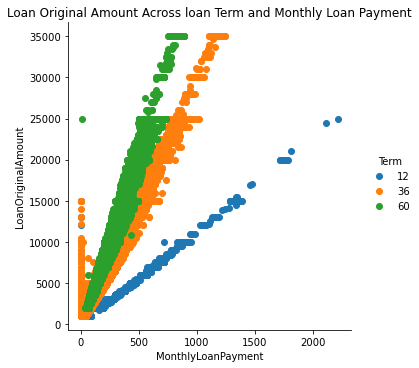

In [101]:
g = sns.FacetGrid(data = new_prsper, hue = 'Term', size = 5,)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
plt.title('Loan Original Amount Across loan Term and Monthly Loan Payment')
g.add_legend()

##### Observation

From the plot, as earlier assumed, a third variable, Loan Term is involved. This plot above shows that borrowers with longer Loan Term 36, 60 months receives higher Loan amount.
For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

Also, I observed that For a longer Loan Term the scheduled monthly payment is less than that of small term (12months).


#### Next, I want to understand how Loan Term and Prosper score effects the Loan Amount to be given

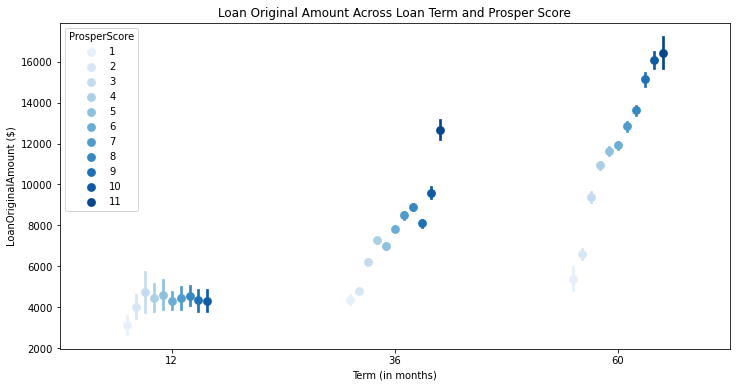

In [102]:
fig = plt.figure(figsize = [12, 6])
ax = sns.pointplot(data = new_prsper, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show()

##### Observation

This plot shows that if the Loan Term (in months) is higher say 60 months and the Prosper Score is higher (less risk) say 10 or 11, the borrower is more likely to get a large Loan Amount.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Monthly Loan payment being positively correlated with Loan Amount was strengthened by Loan Term. Loan term is an important factor in issuing out loans. Larger Loan Amounts are issued out for longer term.

> I discovered that though Loan Term plays a part in determining the amount of loan to be given out. It is also influenced by the Prosper score (risk score).That is, The Longer the Loan Term, and the better the risk score(Prosper Score), the larger the Loan Amount to be given out. This could be because Lenders are more open to giving out loans to borrowers who they don't assess as risks(for defaulting), and providing a long term to pay back the large Loan amount as an assurance. 

### Were there any interesting or surprising interactions between features?

> There wasn't any surprising interactions between features here.

## Conclusions

> Steps taken during the Data Exploration;

* I started my exploration by importing the packages needed for the project, then the data, understanding the variables by looking at the data dictionary. Then, I performed  some preliminary assessment and cleaning in data wrangling phase.

* I created a subset of the dataframe, this subset dataframe containing variables I was particularly interested in exploring.

* I started with The Univariate plotting, and explored the distribution of my main feature, Loan Original Amount, and predictor variables as well. I introduced these variables well in the univariate plotting section, before diving to the next.

* In Bivariate section, I used a standard heat map to show relationship between the numerical variables, then I plotted scatterplot subplots of variables to check further.

* I plotted a matrix plot grid to see how the Numerical variables (particularly Loan Amount) were affected by the Categorical variables.

* I delved further in using individual plots to show relationships between the main variable and predictor variables (StatedMonthlyIncome, DebtToIncomeRatio). I decided to show which categorical features got the most Loan amounts with bar plots (HomeOwners, Occupation, ProsperScore 10/11).

* Delving into the multivariate plotting, to figure out if they were features that could strengthen some relationships observed. I discovered a few, like Loan Term, Prosper Risk Score.

### Summary of my findings

> In this Exploratory analysis, I discovered that more loans were issued in the year 2013 and also during January, Febuary, September, October, November, December Months. I discovered that for a Large Loan the Loan Term is 36 or 60 months.

> To be granted access to these large loans the person needs to have a good DebtToIncomeRatio( preferably 0.50 or lesser) dependent on Loan Type.

> To get a large loan as a borrower, He/She needs to have an Occupation that pays a Large Monthly Income, To show ability to pay back. Or, at least have a Large Monthly Income.

> Also, He/She need to have a good prosper Risk Score (10/11) and possibly own a Home as well (to show stability or for Collateral).
